## Data Preparation

In [1]:
import pandas as  pd
import numpy as np

In [2]:
data_path = r"C:\Users\LATITUDE\applied_data_science\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"

In [3]:
pd_raw = pd.read_csv(data_path)

In [4]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,20155,20677,21251,21668,22204,22729,23281,23875,24471,25142
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1930,1933,1943,1946,1953,1958,1962,1976,1979,1983
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,11376,11601,11779,11902,12025,12097,12381,12415,12523,12639


In [5]:
time_idx = pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({'date': time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw[pd_raw['Country/Region']=='India'].iloc[:,4::].sum(axis=0)

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
8/31/20    3691166
9/1/20     3769523
9/2/20     3853406
9/3/20     3936747
9/4/20     4023179
Length: 227, dtype: int64

In [8]:
country_list = ['Italy',
               'US',
               'Spain',
               'India',
               'Brazil']

In [9]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

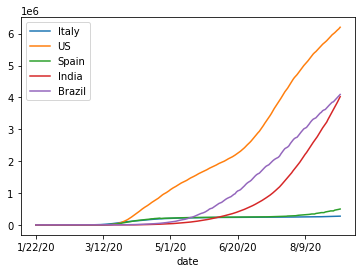

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [11]:
from datetime import datetime

In [12]:
datetime.strptime(df_plot.date[0], "%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [13]:
time_idx = [datetime.strptime(each, "%m/%d/%y")for each in df_plot.date]
time_str = [each.strftime('%Y-%m-%d') for each in time_idx]

In [14]:
df_plot['date']=time_idx

In [15]:
df_plot.head()

,date,Italy,US,Spain,India,Brazil
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [16]:
df_plot.to_csv(r"C:\Users\LATITUDE\applied_data_science\data\processed\COVID_small_flat_table.csv", sep =';')

# Relational Data Model

In [17]:
pd_raw = pd.read_csv(r"C:\Users\LATITUDE\applied_data_science\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv")
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876


In [18]:
pd_database=pd_raw.rename(columns={
    'Country/Region':'country',
    'Province/State':'state'
})
pd_database = pd_database.drop(['Lat','Long'], axis=1)
pd_database.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304
1,NaN,Albania,0,0,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876


In [20]:
pd_relational_model=pd_database.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [21]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [22]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [23]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [26]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv(r'C:\Users\LATITUDE\applied_data_science\data\processed\COVID_relational_confirmed.csv',sep=';',index=False)

In [27]:

print(pd_relational_model[pd_relational_model['country']=='US'].tail())

             date     state country  confirmed
101686 2020-09-02  Zhejiang      US    6113510
101872 2020-09-03       NaN      US    6150016
102138 2020-09-03  Zhejiang      US    6150016
102324 2020-09-04       NaN      US    6200518
102590 2020-09-04  Zhejiang      US    6200518


In [28]:

pd_raw_US=pd.read_csv(r'C:\Users\LATITUDE\applied_data_science\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_US.csv')
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1281,1284,1296,1309,1345,1348,1354,1345,1349,1355
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4166,4199,4230,4307,4402,4422,4445,4458,4495,4513
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,616,614,620,624,628,628,629,617,614,616
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,513,515,517,523,533,535,538,541,542,545
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,968,979,983,1004,1025,1034,1045,1036,1037,1049


In [29]:
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [30]:
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [31]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [32]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [33]:
pd_relational_model_all.to_csv(r'C:\Users\LATITUDE\applied_data_science\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [34]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

             date    state country  confirmed
102150 2020-01-22  Alabama      US          0
102151 2020-01-22  Alabama      US          0
102152 2020-01-22  Alabama      US          0
102153 2020-01-22  Alabama      US          0
102154 2020-01-22  Alabama      US          0
...           ...      ...     ...        ...
860325 2020-09-04  Wyoming      US        440
860326 2020-09-04  Wyoming      US        308
860327 2020-09-04  Wyoming      US          0
860328 2020-09-04  Wyoming      US        110
860329 2020-09-04  Wyoming      US         20

[758180 rows x 4 columns]


In [35]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [36]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
...,...,...
2020-08-31,US,6030587
2020-09-01,US,6073840
2020-09-02,US,6113510
